# Analizar un posible conjunto de datos

In [3]:
# Origen de nuestros datos
# https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process/data

In [7]:
# Configuremos el acceso a la infraestructura de kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

# Definir un diccionario para almacenar el nombre del usuario y la llave de acceso
api_token_26feb2025 = {"username":"robintux","key":"ca9634802e098162a09e1006da3dbe94"}

import json
with open("/root/.kaggle/kaggle.json", "w") as file:
  json.dump(api_token_26feb2025, file)

# Asignemos unos permisos adecuados al archivo kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Descargamos desde el servidor de kaggle el archivo de datos
!kaggle datasets download edumagalhaes/quality-prediction-in-a-mining-process

Dataset URL: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process
License(s): CC0-1.0
 86% 44.0M/50.9M [00:00<00:00, 134MB/s]
100% 50.9M/50.9M [00:00<00:00, 115MB/s]


In [9]:
# Descomprimimos el archivo descargado
!unzip quality-prediction-in-a-mining-process.zip

Archive:  quality-prediction-in-a-mining-process.zip
  inflating: MiningProcess_Flotation_Plant_Database.csv  


# Analicemos el dataset : MiningProcess_Flotation_Plant_Database.csv

In [10]:
# MOdulos y dataset
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carguemos el dataset a memoria ram
mina1 = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")
mina1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date                          737453 non-null  object
 1   % Iron Feed                   737453 non-null  object
 2   % Silica Feed                 737453 non-null  object
 3   Starch Flow                   737453 non-null  object
 4   Amina Flow                    737453 non-null  object
 5   Ore Pulp Flow                 737453 non-null  object
 6   Ore Pulp pH                   737453 non-null  object
 7   Ore Pulp Density              737453 non-null  object
 8   Flotation Column 01 Air Flow  737453 non-null  object
 9   Flotation Column 02 Air Flow  737453 non-null  object
 10  Flotation Column 03 Air Flow  737453 non-null  object
 11  Flotation Column 04 Air Flow  737453 non-null  object
 12  Flotation Column 05 Air Flow  737453 non-null  object
 13 

In [16]:
mina1

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,"55,2","16,98","3019,53","557,434","395,713","10,0664","1,74","249,214","253,235",...,"250,884","457,396","432,962","424,954","443,558","502,255","446,37","523,344","66,91","1,31"
1,2017-03-10 01:00:00,"55,2","16,98","3024,41","563,965","397,383","10,0672","1,74","249,719","250,532",...,"248,994","451,891","429,56","432,939","448,086","496,363","445,922","498,075","66,91","1,31"
2,2017-03-10 01:00:00,"55,2","16,98","3043,46","568,054","399,668","10,068","1,74","249,741","247,874",...,"248,071","451,24","468,927","434,61","449,688","484,411","447,826","458,567","66,91","1,31"
3,2017-03-10 01:00:00,"55,2","16,98","3047,36","568,665","397,939","10,0689","1,74","249,917","254,487",...,"251,147","452,441","458,165","442,865","446,21","471,411","437,69","427,669","66,91","1,31"
4,2017-03-10 01:00:00,"55,2","16,98","3033,69","558,167","400,254","10,0697","1,74","250,203","252,136",...,"248,928","452,441","452,9","450,523","453,67","462,598","443,682","425,679","66,91","1,31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,"49,75","23,2","2710,94","441,052","386,57","9,62129","1,65365","302,344","298,786",...,"313,695","392,16","430,702","872,008","418,725","497,548","446,357","416,892","64,27","1,71"
737449,2017-09-09 23:00:00,"49,75","23,2","2692,01","473,436","384,939","9,62063","1,65352","303,013","301,879",...,"236,7","401,505","404,616","864,409","418,377","506,398","372,995","426,337","64,27","1,71"
737450,2017-09-09 23:00:00,"49,75","23,2","2692,2","500,488","383,496","9,61874","1,65338","303,662","307,397",...,"225,879","408,899","399,316","867,598","419,531","503,414","336,035","433,13","64,27","1,71"
737451,2017-09-09 23:00:00,"49,75","23,2","1164,12","491,548","384,976","9,61686","1,65324","302,55","301,959",...,"308,115","405,107","466,832","876,591","407,299","502,301","340,844","433,966","64,27","1,71"


In [ ]:
# Cambiemos la coma decimal por el punto decimal
mina1["% Iron Feed"].str.replace(",",".").astype("float64")

In [20]:
# Debo replicar la anterior transformacion a todas las columnas excepto date
for col in mina1.columns[1:]:
  print("Columna :" + col)
  mina1[col] = mina1[col].str.replace(",",".").astype("float64")

Columna :% Iron Feed
Columna :% Silica Feed
Columna :Starch Flow
Columna :Amina Flow
Columna :Ore Pulp Flow
Columna :Ore Pulp pH
Columna :Ore Pulp Density
Columna :Flotation Column 01 Air Flow
Columna :Flotation Column 02 Air Flow
Columna :Flotation Column 03 Air Flow
Columna :Flotation Column 04 Air Flow
Columna :Flotation Column 05 Air Flow
Columna :Flotation Column 06 Air Flow
Columna :Flotation Column 07 Air Flow
Columna :Flotation Column 01 Level
Columna :Flotation Column 02 Level
Columna :Flotation Column 03 Level
Columna :Flotation Column 04 Level
Columna :Flotation Column 05 Level
Columna :Flotation Column 06 Level
Columna :Flotation Column 07 Level
Columna :% Iron Concentrate
Columna :% Silica Concentrate


In [21]:
# Verificar que el tipo de cado de las columnas trabajadas es el correcto
mina1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          737453 non-null  object 
 1   % Iron Feed                   737453 non-null  float64
 2   % Silica Feed                 737453 non-null  float64
 3   Starch Flow                   737453 non-null  float64
 4   Amina Flow                    737453 non-null  float64
 5   Ore Pulp Flow                 737453 non-null  float64
 6   Ore Pulp pH                   737453 non-null  float64
 7   Ore Pulp Density              737453 non-null  float64
 8   Flotation Column 01 Air Flow  737453 non-null  float64
 9   Flotation Column 02 Air Flow  737453 non-null  float64
 10  Flotation Column 03 Air Flow  737453 non-null  float64
 11  Flotation Column 04 Air Flow  737453 non-null  float64
 12  Flotation Column 05 Air Flow  737453 non-nul

In [22]:
# Por el momento voy a dejar de lado la informacion temporal
mina1 = mina1.iloc[:, 1:]
mina1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   % Iron Feed                   737453 non-null  float64
 1   % Silica Feed                 737453 non-null  float64
 2   Starch Flow                   737453 non-null  float64
 3   Amina Flow                    737453 non-null  float64
 4   Ore Pulp Flow                 737453 non-null  float64
 5   Ore Pulp pH                   737453 non-null  float64
 6   Ore Pulp Density              737453 non-null  float64
 7   Flotation Column 01 Air Flow  737453 non-null  float64
 8   Flotation Column 02 Air Flow  737453 non-null  float64
 9   Flotation Column 03 Air Flow  737453 non-null  float64
 10  Flotation Column 04 Air Flow  737453 non-null  float64
 11  Flotation Column 05 Air Flow  737453 non-null  float64
 12  Flotation Column 06 Air Flow  737453 non-nul

In [23]:
# Valores faltantes por columna
mina1.isnull().sum()

,0
% Iron Feed,0
% Silica Feed,0
Starch Flow,0
Amina Flow,0
Ore Pulp Flow,0
Ore Pulp pH,0
Ore Pulp Density,0
Flotation Column 01 Air Flow,0
Flotation Column 02 Air Flow,0
Flotation Column 03 Air Flow,0


In [24]:
# Total de valores faltantes
mina1.isnull().sum().sum()

0

# Primer modelo de Aprendizaje Automatico : Regresion Lineal

In [25]:
# Modulo scikit-learn

# Particionado de datos : train/test
from sklearn.model_selection import train_test_split

# Clase a modelar
from sklearn.linear_model import LinearRegression

# Submodulo metrics : Calcular indicadores de calidad
from sklearn import metrics

In [26]:
# Definamos a las variables independientes y a la variable dependiente
y = mina1["% Silica Concentrate"]
X = mina1.drop(["% Silica Concentrate"], axis = 1)

In [27]:
y.shape

(737453,)

In [28]:
X.shape

(737453, 22)

In [33]:
# Primer Paso : Particionar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

# Segundo paso : INstanciar la clase a modelar
model_base_mina1 = LinearRegression()
# y = a1 * X1 + a2 * x2 + ... + a22 * X22 + b
# Hiperplano : vive en un espacio de 23D

# Tercer paso : Ajustar el modelo
# Calcular los parametros del modelo a partir del subconjunto de datos de entrenamiento
model_base_mina1.fit(X_train, y_train)

# Cuarto Paso - Etapa 1
# Usar el modelo recientemente entrenado/ajustado junto con X_test para construir
# pronosticos de y_test
y_forecast_base = model_base_mina1.predict(X_test)

# Cuarto Paso - Etapa 2
# Comparar y_test con lo que el modelo pronosticoo en la etapa 1
mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast_base)

# Mostremos el indicador de calidad obtenido
print("KPI => ", mape1)

# KPI =>  0.24159941452019348
# KPI =>  0.2419631333428347
# KPI =>  0.24235221198780887

#

KPI =>  0.2415731110997008


In [34]:
# Necesito empaquetar el codigo de la celda anterior en una funcion que me permita
# obtener el mape para diferentes porcentajes de datos de entrenamiento

def analisis_model_base (ts):
  # Primer Paso : Particionar los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = ts)

  # Segundo paso : INstanciar la clase a modelar
  model_base_mina1 = LinearRegression()
  # y = a1 * X1 + a2 * x2 + ... + a22 * X22 + b
  # Hiperplano : vive en un espacio de 23D

  # Tercer paso : Ajustar el modelo
  # Calcular los parametros del modelo a partir del subconjunto de datos de entrenamiento
  model_base_mina1.fit(X_train, y_train)

  # Cuarto Paso - Etapa 1
  # Usar el modelo recientemente entrenado/ajustado junto con X_test para construir
  # pronosticos de y_test
  y_forecast_base = model_base_mina1.predict(X_test)

  # Cuarto Paso - Etapa 2
  # Comparar y_test con lo que el modelo pronosticoo en la etapa 1
  mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast_base)

  return mape1

In [35]:
# Primera Prueba
analisis_model_base(0.5)

0.24205685575034658

In [47]:
# Repitamos este analisis un numero de veces : 10**6

# En una lista vamor a almacenar todos estos resultados
lista_mape1 = []
lista_prct_test = []
for vez_exper in range(10**3):
  # El porcentaje de datos para testear el modelo lo vamos a generar de manera aleatoria
  ts = np.random.randint(5,95)/100
  lista_prct_test.append(ts)
  lista_mape1.append(analisis_model_base(ts))


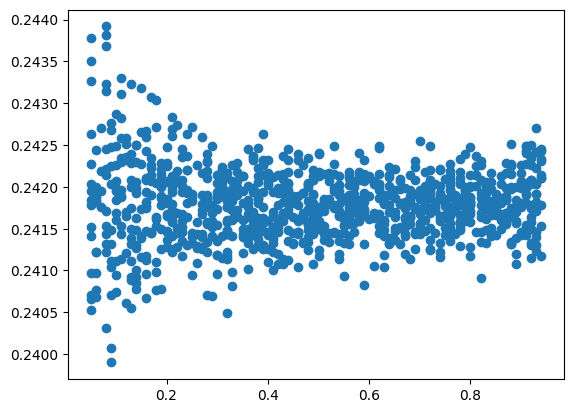

In [48]:
ts_mape = pd.DataFrame.from_dict({"ts": lista_prct_test, "MAPE":lista_mape1}).sort_values(by = "MAPE",
                                                                                ascending = False)

plt.scatter(ts_mape.ts , ts_mape.MAPE)

# Observacion : Validar que es lo que ocurre si se realiza un millon de estos experimentos

In [50]:
# Guardemos los resultados en disco duro
ts_mape.to_csv("mape_modelo1.csv")

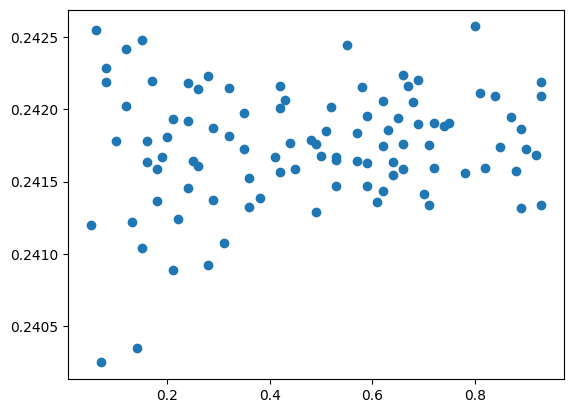

In [51]:
# Consideremos un modelo que no contemple el termino independiente
# help(LinearRegression)

# Necesito empaquetar el codigo de la celda anterior en una funcion que me permita
# obtener el mape para diferentes porcentajes de datos de entrenamiento

def analisis_model_base_sin_b(ts):
  # Primer Paso : Particionar los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = ts)

  # Segundo paso : INstanciar la clase a modelar
  model_base_mina1 = LinearRegression(fit_intercept=False)
  # y = a1 * X1 + a2 * x2 + ... + a22 * X22 + b
  # Hiperplano : vive en un espacio de 23D

  # Tercer paso : Ajustar el modelo
  # Calcular los parametros del modelo a partir del subconjunto de datos de entrenamiento
  model_base_mina1.fit(X_train, y_train)

  # Cuarto Paso - Etapa 1
  # Usar el modelo recientemente entrenado/ajustado junto con X_test para construir
  # pronosticos de y_test
  y_forecast_base = model_base_mina1.predict(X_test)

  # Cuarto Paso - Etapa 2
  # Comparar y_test con lo que el modelo pronosticoo en la etapa 1
  mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast_base)

  return mape1

# En una lista vamor a almacenar todos estos resultados
lista_mape1 = []
lista_prct_test = []
for vez_exper in range(10**2):
  # El porcentaje de datos para testear el modelo lo vamos a generar de manera aleatoria
  ts = np.random.randint(5,95)/100
  lista_prct_test.append(ts)
  lista_mape1.append(analisis_model_base(ts))

ts_mape = pd.DataFrame.from_dict({"ts": lista_prct_test, "MAPE":lista_mape1}).sort_values(by = "MAPE",
                                                                                ascending = False)

ts_mape.to_csv("mape_modelo1_sin_intercept.csv")
plt.scatter(ts_mape.ts , ts_mape.MAPE)

# Modelo de arbol de decision

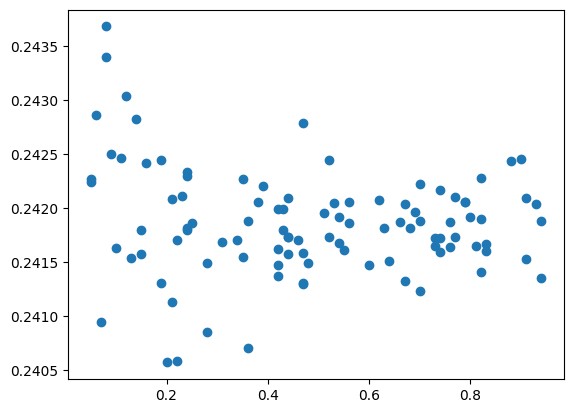

In [52]:
# Cargar la clase DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

def analisis_model_arbol(ts):
  # Primer Paso : Particionar los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = ts)

  # Segundo paso : INstanciar la clase a modelar
  model_base_arbol = DecisionTreeRegressor()
  # y = a1 * X1 + a2 * x2 + ... + a22 * X22 + b
  # Hiperplano : vive en un espacio de 23D

  # Tercer paso : Ajustar el modelo
  # Calcular los parametros del modelo a partir del subconjunto de datos de entrenamiento
  model_base_arbol.fit(X_train, y_train)

  # Cuarto Paso - Etapa 1
  # Usar el modelo recientemente entrenado/ajustado junto con X_test para construir
  # pronosticos de y_test
  y_forecast_base = model_base_arbol.predict(X_test)

  # Cuarto Paso - Etapa 2
  # Comparar y_test con lo que el modelo pronosticoo en la etapa 1
  mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast_base)

  return mape1


# En una lista vamor a almacenar todos estos resultados
lista_mape1 = []
lista_prct_test = []
for vez_exper in range(10**2):
  # El porcentaje de datos para testear el modelo lo vamos a generar de manera aleatoria
  ts = np.random.randint(5,95)/100
  lista_prct_test.append(ts)
  lista_mape1.append(analisis_model_base(ts))

ts_mape = pd.DataFrame.from_dict({"ts": lista_prct_test, "MAPE":lista_mape1}).sort_values(by = "MAPE",
                                                                                ascending = False)

ts_mape.to_csv("mape_modelo_base_arbol1.csv")
plt.scatter(ts_mape.ts , ts_mape.MAPE)

In [63]:
# Documentacion de la clase DecisionTreeRegressor()
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error wi

In [57]:
# Ultimo de estos arboles
DT_prueba = DecisionTreeRegressor()
# dir(DT_prueba)
help(DT_prueba.get_depth)

Help on method get_depth in module sklearn.tree._classes:

get_depth() method of sklearn.tree._classes.DecisionTreeRegressor instance
    Return the depth of the decision tree.
    
    The depth of a tree is the maximum distance between the root
    and any leaf.
    
    Returns
    -------
    self.tree_.max_depth : int
        The maximum depth of the tree.



In [59]:
# modificar nuestra instancia de la clase DecisionTreeRegressor() usando el parametro
# max_depth (int)


# Cargar la clase DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

def analisis_model_arbol(ts):
  # Primer Paso : Particionar los datos
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = ts)

  # Segundo paso : INstanciar la clase a modelar
  prof = np.random.randint(5,50)
  model_base_arbol = DecisionTreeRegressor(max_depth = prof)


  # Tercer paso : Ajustar el modelo
  # Calcular los parametros del modelo a partir del subconjunto de datos de entrenamiento
  model_base_arbol.fit(X_train, y_train)

  # Cuarto Paso - Etapa 1
  # Usar el modelo recientemente entrenado/ajustado junto con X_test para construir
  # pronosticos de y_test
  y_forecast_base = model_base_arbol.predict(X_test)

  # Cuarto Paso - Etapa 2
  # Comparar y_test con lo que el modelo pronosticoo en la etapa 1
  mape1 = metrics.mean_absolute_percentage_error(y_test, y_forecast_base)

  return prof, mape1



In [60]:
# Prueba de la funcion de la celda anterior
analisis_model_arbol(ts)

(10, 0.14174927336585527)

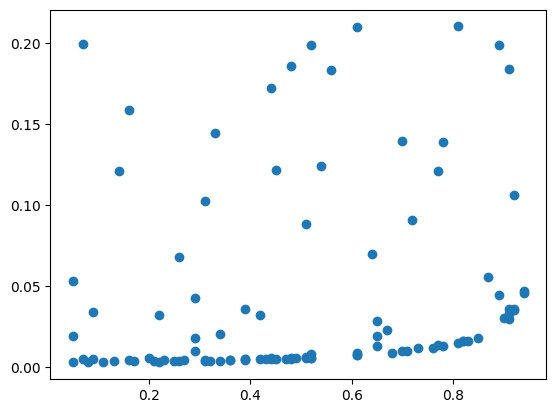

In [62]:

# En una lista vamor a almacenar todos estos resultados
lista_mape1 = []
lista_prof = []
lista_prct_test = []
for vez_exper in range(10**2):
  # El porcentaje de datos para testear el modelo lo vamos a generar de manera aleatoria
  ts = np.random.randint(5,95)/100
  lista_prct_test.append(ts)
  output_model = analisis_model_arbol(ts)
  lista_prof.append(output_model[0])
  lista_mape1.append(output_model[1])

ts_mape = pd.DataFrame.from_dict({"ts": lista_prct_test, "MAPE":lista_mape1, "prof":lista_prof}).sort_values(by = "MAPE",
                                                                                ascending = False)

ts_mape.to_csv("mape_modelo_base_arbol_profundidad.csv")
plt.scatter(ts_mape.ts , ts_mape.MAPE)